In [32]:
# only for test
from IPython import get_ipython
get_ipython().magic('reset -sf')  # clear cashes
import glob, os


print('Clearing cashes')
print(os.path.abspath('.'))




Clearing cashes
c:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition\src


In [ ]:
# initialisation
import csv
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq


In [35]:
# csv reader (faster)
emg_1_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_2_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_3_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
actionList = ['d', 'u', 'l', 'r', 'f']


folderPath_hyq = os.path.abspath('./Dataset/new/hyqData/')
folderPath_zjh = os.path.abspath('./Dataset/new/zjhData/')
folderPath_sgf = os.path.abspath('./Dataset/new/sgfData/')

filePathList=[]
filePathList.append(glob.glob(os.path.join(folderPath_hyq, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_zjh, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_sgf, "*.csv")))


for filePathListIndex in filePathList:
    csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
    dl=[]
    print('Reading .csv:')
    for f in filePathListIndex:
        csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
        print(f[-5])

    print(len(csvData['d']))
    print(len(csvData['u']))
    print(len(csvData['l']))
    print(len(csvData['r']))
    print(len(csvData['f']))
    print('Separating EMG signal channels:')
    for currentAction in actionList:
        print(currentAction)
        for row in range(len(csvData[currentAction])):
            emg_1_csv[currentAction].append(csvData[currentAction][row][0])
            emg_2_csv[currentAction].append(csvData[currentAction][row][1])
            emg_3_csv[currentAction].append(csvData[currentAction][row][2])



print('Lengths of each action: (down, up, left, right, and fist)')
print(len(emg_1_csv['d']))
print(len(emg_2_csv['d']))
print(len(emg_3_csv['d']))
print(len(emg_1_csv['u']))
print(len(emg_2_csv['u']))
print(len(emg_3_csv['u']))
print(len(emg_1_csv['l']))
print(len(emg_2_csv['l']))
print(len(emg_3_csv['l']))
print(len(emg_1_csv['r']))
print(len(emg_2_csv['r']))
print(len(emg_3_csv['r']))
print(len(emg_1_csv['f']))
print(len(emg_2_csv['f']))
print(len(emg_3_csv['f']))

Reading .csv:
d
f
l
r
u
16500
15600
17400
15600
15000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
d
f
l
r
u
30000
30000
30000
30000
30000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
d
f
l
r
u
16643
15948
16200
13500
16667
Separating EMG signal channels:
d
u
l
r
f
Lengths of each action: (down, up, left, right, and fist)
63143
63143
63143
61548
61548
61548
63600
63600
63600
59100
59100
59100
61667
61667
61667


Loading: d
211
211
211
Loading: u
206
206
206
Loading: l
212
212
212
Loading: r
197
197
197
Loading: f
206
206
206


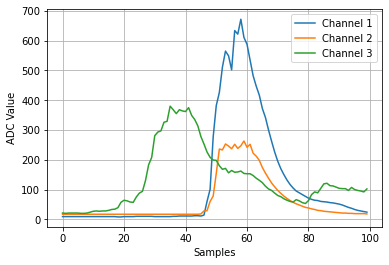

2829
594
598
567
535
535


In [95]:
dataLength=0
record_length=300
window_length=100
window_1=50
window_2=40
window_3=30

emg_1_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_2_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_3_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

for actionIndex in range(len(actionList)):
    print('Loading: '+actionList[actionIndex])
  
    emg_1_slice = [emg_1_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_1_csv[actionList[actionIndex]]),record_length)]
    emg_2_slice = [emg_2_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_2_csv[actionList[actionIndex]]),record_length)]
    emg_3_slice = [emg_3_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_3_csv[actionList[actionIndex]]),record_length)]

    print(len(emg_1_slice))
    print(len(emg_2_slice))
    print(len(emg_3_slice))
    

    generatedIndex=0
    for i in range(len(emg_1_slice)-1):
        max_1 = emg_1_slice[i].index(max(emg_1_slice[i]))
        max_2 = emg_2_slice[i].index(max(emg_2_slice[i]))
        max_3 = emg_3_slice[i].index(max(emg_3_slice[i]))
        avgMax=int((max_1+max_2+max_3)/3)
        
        if max_1>window_1 and max_1<record_length-window_1 and max_2>window_1 and max_2<record_length-window_1 and max_3>window_1 and max_3<record_length-window_1:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_1:avgMax+(window_length-window_1)]
            generatedIndex+=1
            dataLength+=1
        if max_1>window_2 and max_1<record_length-window_2 and max_2>window_2 and max_2<record_length-window_2 and max_3>window_2 and max_3<record_length-window_2:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_2:avgMax+(window_length-window_2)]
            generatedIndex+=1
            dataLength+=1
        if max_1>window_3 and max_1<record_length-window_3 and max_2>window_3 and max_2<record_length-window_3 and max_3>window_3 and max_3<record_length-window_3:
            emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_3:avgMax+(window_length-window_3)]
            generatedIndex+=1
            dataLength+=1


# emg_1_window = np.array(emg_1_window['d'])
# emg_2_window = np.array(emg_2_window['d'])
# emg_3_window = np.array(emg_3_window['d'])
# print(emg_1_window.shape)
# emg_window=emg_1_window['d'][0]          


plt.plot(emg_1_window['d'][0])
plt.plot(emg_2_window['d'][0])
plt.plot(emg_3_window['d'][0])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.grid()
plt.show()


print(dataLength)
print(len(emg_1_window['d']))
print(len(emg_1_window['u']))
print(len(emg_1_window['l']))
print(len(emg_1_window['r']))
print(len(emg_1_window['f']))

In [ ]:
# feature extraction

featureDict = {'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
featureList = []

fs = 100 # sample frequency
T = 1/fs # sample rate


for actionIndex in range(len(actionList)):
    emg_1=[]
    emg_2=[]
    emg_3=[]
    print(actionList[actionIndex])
    for row in range(len(emg_1_window[actionList[actionIndex]])):
        emg_1=emg_1_window[actionList[actionIndex]][row]
        emg_2=emg_2_window[actionList[actionIndex]][row]
        emg_3=emg_3_window[actionList[actionIndex]][row]
        
        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0

        # some temporary variables

        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0

        freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
        freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
        freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0

        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))

            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2

            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1

            mav_emg_1 = abs_sum_temp1/len(emg_1)
            mav_emg_2 = abs_sum_temp2/len(emg_2)
            mav_emg_3 = abs_sum_temp3/len(emg_3)

            rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
            rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
            rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))

        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]

        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]

        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)

        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
        
#         print('check')
#         featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
#                                                             wl_emg_1, wl_emg_2, wl_emg_3, 
#                                                             ssc_emg_1, ssc_emg_2, ssc_emg_3, 
#                                                             rms_emg_1, rms_emg_2, rms_emg_3]
        featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                            wl_emg_1, wl_emg_2, wl_emg_3, 
                                                            ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                            rms_emg_1, rms_emg_2, rms_emg_3, 
                                                            meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                            medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                            meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                            vcf_emg_1, vcf_emg_2, vcf_emg_3]




print('Loading completed')

In [48]:
print(len(emg_1_window['d'][1]))

100


In [98]:
# create labels for data samples
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv1D, BatchNormalization
from keras.utils import np_utils,normalize
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)


x_val=[]
x_raw = np.zeros((dataLength,100,3))

y_val=[]
y_raw = []

def labelSwitch(arg):
    switcher = {
        'l': 1,
        'r': 2,
        'u': 3,
        'd': 4,
        'f': 5
    }
    return switcher[arg]

windowLength=100
i=0
j=''
dictLength=0
current = ['d', 'u', 'l', 'r', 'f']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

rawLength=0
for j in range(len(current)):
    for i in range(len(emg_1_window[current[j]])-1):
        for m in range(windowLength):
            for temp in range(len(emg_1_window[current[j]][i])):
                x_raw[i][m][0]=emg_1_window[current[j]][i][temp]
                x_raw[i][m][1]=emg_2_window[current[j]][i][temp]
                x_raw[i][m][2]=emg_3_window[current[j]][i][temp]
        y_raw.append(labelSwitch(current[j]))
        rawLength+=1

print(len(x_raw[2]))

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)
x_raw_array = np.array(x_raw)
y_raw_array = np.array(y_raw).reshape(rawLength,1)

print(x_raw_array.shape)

# normalisation
x_val_array = normalize(x_val_array, axis = 1)


state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)

state = np.random.get_state()
np.random.shuffle(x_raw_array)
np.random.set_state(state)
np.random.shuffle(y_raw_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])

x_raw_train, x_raw_test, x_raw_validate = np.split(x_raw_array, [TRAIN_SPLIT, TEST_SPLIT])
y_raw_train, y_raw_test, y_raw_validate = np.split(y_raw_array, [TRAIN_SPLIT, TEST_SPLIT])


y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)

y_raw_train_class = np_utils.to_categorical(y_raw_train)
y_raw_test_class = np_utils.to_categorical(y_raw_test)
y_raw_validate_class = np_utils.to_categorical(y_raw_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)

print(x_raw_train.shape)
print(y_raw_train.shape)



100
(2829, 100, 3)
(1697, 24)
(1697, 6)
(567, 24)
(567, 6)
(565, 24)
(565, 6)
(1697, 100, 3)
(1697, 1)


Epoch 1/80
34/34 [==============================] - 0s 11ms/step - loss: 2.0442 - accuracy: 0.1915 - val_loss: 1.7431 - val_accuracy: 0.1975
Epoch 2/80
34/34 [==============================] - 0s 4ms/step - loss: 1.7487 - accuracy: 0.2610 - val_loss: 1.7310 - val_accuracy: 0.1922
Epoch 3/80
34/34 [==============================] - 0s 4ms/step - loss: 1.7099 - accuracy: 0.2463 - val_loss: 1.7124 - val_accuracy: 0.1958
Epoch 4/80
34/34 [==============================] - 0s 4ms/step - loss: 1.6492 - accuracy: 0.2640 - val_loss: 1.7057 - val_accuracy: 0.1940
Epoch 5/80
34/34 [==============================] - 0s 4ms/step - loss: 1.6230 - accuracy: 0.2858 - val_loss: 1.6925 - val_accuracy: 0.2116
Epoch 6/80
34/34 [==============================] - 0s 3ms/step - loss: 1.5768 - accuracy: 0.3005 - val_loss: 1.6979 - val_accuracy: 0.2046
Epoch 7/80
34/34 [==============================] - 0s 4ms/step - loss: 1.5716 - accuracy: 0.3058 - val_loss: 1.6994 - val_accuracy: 0.2011
Epoch 8/80
34/34 [=

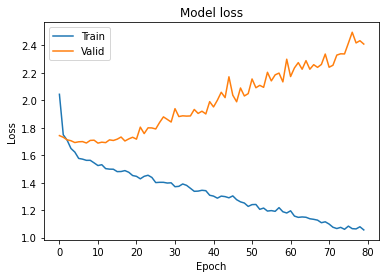

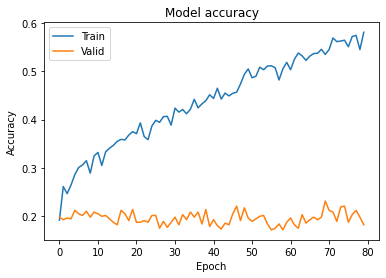

Test loss: 2.4617831707000732
Test accuracy: 0.19292035698890686


In [42]:
# Model

model = Sequential()
# model.add(Conv1D(32, kernel_size = 3, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
# model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

# opt = RMSprop(lr=0.1, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=80, batch_size=50, validation_data=(x_validate, y_validate_class))

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])